In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data
url = 'https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/export?format=csv&gid=0'
data = pd.read_csv(url)

Basic works

In [3]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
#Check missing value
data.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [5]:
#Basic Statistical information
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [6]:
#Check time
print("mindate: ", data.created_at.min())
print("maxdate: ", data.created_at.max())

mindate:  2017-03-01 0:08:09
maxdate:  2017-03-30 9:55:00


In [7]:
#Calculate AOV
aov = np.mean(data.order_amount)
print('AOV: ', aov)

AOV:  3145.128


In [8]:
#Curious about average price per pair
#Create a column "average" calculating the average price per pair
data["average"] = data["order_amount"]/data["total_items"]

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

From the basic statistic information, it shows that there are outliers in order_amount and total_items. As a result, the AOV calculation will go wrong.

In [9]:
#Take a look about those order amount > AOV
data[data.order_amount > aov]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,average
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
...,...,...,...,...,...,...,...,...
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44,25725.0
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00,352.0
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00,352.0


We can observe that those outliers are from shop 42 and shop 78

In [10]:
#Check the outlier shop_id
data[data.order_amount > aov].shop_id.value_counts()

78    46
42    17
Name: shop_id, dtype: int64

From the previous table, it is better to split the data into three groups shop 42, shop 78, and other shops

In [11]:
#Other shops basic statistical information
other_data = data[(data.shop_id != 78) & (data.shop_id != 42)]
other_data.describe()

,order_id,shop_id,user_id,order_amount,total_items,average
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717,150.400163
std,1444.221163,29.154367,86.887947,155.941112,0.982602,23.851202
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000,132.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000


Text(0.5, 0.98, 'shops except 42 and 78')

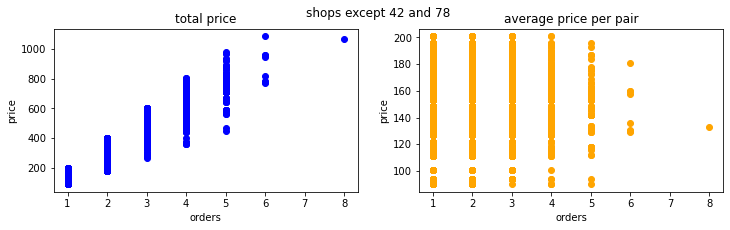

In [12]:
#Other shops visualization
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.scatter(other_data.total_items, other_data.order_amount, color = 'blue')
plt.title("total price")
plt.xlabel("orders")
plt.ylabel("price")
plt.subplot(122)
plt.scatter(other_data.total_items, other_data.average, color = 'orange')
plt.title("average price per pair")
plt.xlabel("orders")
plt.ylabel("price")
plt.suptitle("shops except 42 and 78")

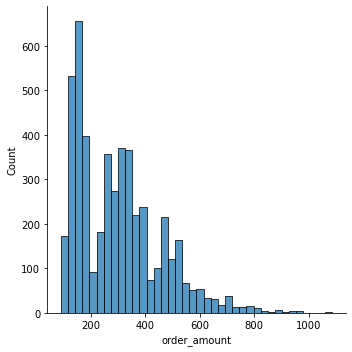

In [13]:
#Other shops order_amount distribution
sns.displot(other_data.order_amount)

In [14]:
print("Other shops AOV: ", other_data.order_amount.mean())
print("Other shops median order value: ", other_data.order_amount.median())
print("Other shops skew: ", other_data.order_amount.skew())

Other shops AOV:  300.1558229655313
Other shops median order value:  284.0
Other shops skew:  1.003106067784531


In [15]:
#Shop 42 and Shop 78
shop78 = data[data.shop_id == 78]
shop42 = data[data.shop_id == 42]

Text(0.5, 0.98, 'shop_id: 42')

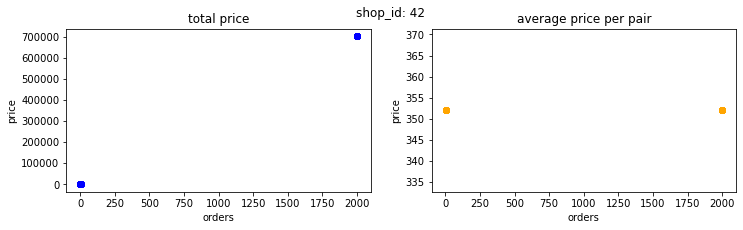

In [16]:
#Shop 42 visualization
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.scatter(shop42.total_items, shop42.order_amount, color = 'blue')
plt.title("total price")
plt.xlabel("orders")
plt.ylabel("price")
plt.subplot(122)
plt.scatter(shop42.total_items, shop42.average, color = 'orange')
plt.title("average price per pair")
plt.xlabel("orders")
plt.ylabel("price")
plt.suptitle("shop_id: 42")

Text(0.5, 0.98, 'shop_id: 78')

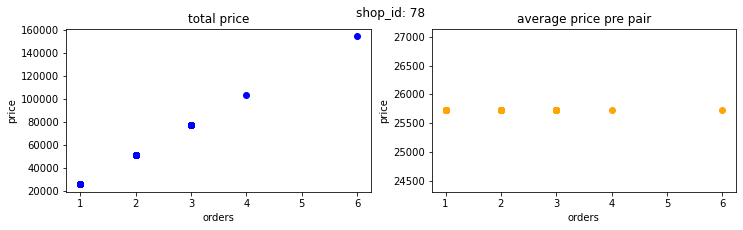

In [17]:
#Shop 78 visualization
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.scatter(shop78.total_items, shop78.order_amount, color = 'blue')
plt.title("total price")
plt.xlabel("orders")
plt.ylabel("price")
plt.subplot(122)
plt.scatter(shop78.total_items, shop78.average, color = 'orange')
plt.title("average price pre pair")
plt.xlabel("orders")
plt.ylabel("price")
plt.suptitle("shop_id: 78")

In [18]:
data["shop_type"] = data["shop_id"].apply(lambda x: x if (x == 42 or x == 78) else "other")

In [19]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,average,shop_type
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0,other
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0,other
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0,other
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0,other
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0,other


In [20]:
AOV = pd.DataFrame(data.groupby("shop_type")["order_amount"].mean().rename("AOV"))
Median = pd.DataFrame(data.groupby("shop_type")["order_amount"].median().rename("Median Order Amount"))
price_per_pair = pd.DataFrame(data.groupby("shop_type")["average"].mean().rename("Price Per Pair"))
sd = pd.DataFrame(data.groupby("shop_type")["order_amount"].std().rename("Standard Deviation"))

In [21]:
new_data = AOV.join(Median).join(sd).join(price_per_pair)

In [22]:
new_data

,AOV,Median Order Amount,Standard Deviation,Price Per Pair
shop_type,,,,
42,235101.490196,704,334860.641587,352.000000
78,49213.043478,51450,26472.227449,25725.000000
other,300.155823,284,155.941112,150.400163
